## Финальный проект по блоку машинное обучение

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (14, 11)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import xgboost 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
df_train = df_train.fillna(0)

In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [8]:
df1 = df_train.iloc[:, 0:100]

In [9]:
df2 = df_train.iloc[:, 101:200]

In [10]:
df3 = df_train.iloc[:, 201:300]

In [11]:
df4 = df_train.iloc[:, 300:371]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 100 columns):
ID                         76020 non-null int64
var3                       76020 non-null int64
var15                      76020 non-null int64
imp_ent_var16_ult1         76020 non-null float64
imp_op_var39_comer_ult1    76020 non-null float64
imp_op_var39_comer_ult3    76020 non-null float64
imp_op_var40_comer_ult1    76020 non-null float64
imp_op_var40_comer_ult3    76020 non-null float64
imp_op_var40_efect_ult1    76020 non-null float64
imp_op_var40_efect_ult3    76020 non-null float64
imp_op_var40_ult1          76020 non-null float64
imp_op_var41_comer_ult1    76020 non-null float64
imp_op_var41_comer_ult3    76020 non-null float64
imp_op_var41_efect_ult1    76020 non-null float64
imp_op_var41_efect_ult3    76020 non-null float64
imp_op_var41_ult1          76020 non-null float64
imp_op_var39_efect_ult1    76020 non-null float64
imp_op_var39_efect_ult3    76020 non-null floa

In [13]:
df1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,2.894041,1.999171,0.000316,0.000079,0.09854,0.085793,0.211247,0.138003,0.167719,0.130308
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,0.656479,1.431902,0.030774,0.015388,0.53493,0.500022,0.890236,0.637259,0.745822,0.618826
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,15.000000,15.000000,3.000000,3.000000,6.00000,3.000000,111.000000,15.000000,18.000000,6.000000


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 99 columns):
num_var13_largo_0            76020 non-null int64
num_var13_largo              76020 non-null int64
num_var13_medio_0            76020 non-null int64
num_var13_medio              76020 non-null int64
num_var13                    76020 non-null int64
num_var14_0                  76020 non-null int64
num_var14                    76020 non-null int64
num_var17_0                  76020 non-null int64
num_var17                    76020 non-null int64
num_var18_0                  76020 non-null int64
num_var18                    76020 non-null int64
num_var20_0                  76020 non-null int64
num_var20                    76020 non-null int64
num_var24_0                  76020 non-null int64
num_var24                    76020 non-null int64
num_var26_0                  76020 non-null int64
num_var26                    76020 non-null int64
num_var25_0                  76020 non-nu

In [15]:
df2.describe()

,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,...,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000,76020.000000,76020.000000,76020.000000,...,76020.0,7.602000e+04,76020.000000,76020.0,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04
mean,0.037332,0.035241,0.000079,0.000079,0.159826,0.072691,0.01614,0.011878,0.008879,0.000079,...,0.0,7.191725e+03,96.352738,0.0,40.449079,2.630887e+05,2.630887e+05,4.867140e+07,5.130229e+06,1.315443e+05
std,0.404822,0.381373,0.015388,0.015388,0.713022,0.610815,0.22426,0.362480,0.288768,0.015388,...,0.0,4.914531e+04,5218.428365,0.0,47.362719,5.129183e+07,5.129183e+07,6.959537e+08,2.264435e+08,3.626904e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,-4.942260e+03,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.000000,0.0,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,3.000000e+00,0.000000,0.0,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,1.200000e+02,0.000000,0.0,99.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,18.000000,3.000000,3.000000,18.000000,111.000000,12.00000,36.000000,27.000000,3.000000,...,0.0,3.008077e+06,740006.610000,0.0,99.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 99 columns):
delta_imp_reemb_var13_1y3        76020 non-null int64
delta_imp_reemb_var17_1y3        76020 non-null int64
delta_imp_reemb_var33_1y3        76020 non-null int64
delta_imp_trasp_var17_in_1y3     76020 non-null int64
delta_imp_trasp_var17_out_1y3    76020 non-null int64
delta_imp_trasp_var33_in_1y3     76020 non-null int64
delta_imp_trasp_var33_out_1y3    76020 non-null int64
delta_imp_venta_var44_1y3        76020 non-null float64
delta_num_aport_var13_1y3        76020 non-null float64
delta_num_aport_var17_1y3        76020 non-null float64
delta_num_aport_var33_1y3        76020 non-null float64
delta_num_compra_var44_1y3       76020 non-null float64
delta_num_reemb_var13_1y3        76020 non-null int64
delta_num_reemb_var17_1y3        76020 non-null int64
delta_num_reemb_var33_1y3        76020 non-null int64
delta_num_trasp_var17_in_1y3     76020 non-null int64
delta_num_trasp_v

In [17]:
df3.describe()

,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,...,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3
count,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,5.261773e+05,6.577217e+05,1.315443e+05,5.524862e+06,4.867140e+07,5.130229e+06,...,1.592791,0.003578,2.194791,3.607064,0.074980,0.144830,0.002486,0.003670,2.119811,3.462234
std,2.235230e+08,1.621798e+08,3.626904e+07,7.253665e+07,7.253665e+07,8.109791e+07,3.626904e+07,2.349869e+08,6.959537e+08,2.264435e+08,...,0.719655,0.088174,9.131406,14.919726,2.089408,4.288145,0.147172,0.202068,8.799494,14.140650
min,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,...,3.000000,3.000000,438.000000,600.000000,210.000000,582.000000,24.000000,24.000000,438.000000,438.000000


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 71 columns):
num_op_var41_efect_ult1          76020 non-null int64
num_op_var41_efect_ult3          76020 non-null int64
num_op_var39_efect_ult1          76020 non-null int64
num_op_var39_efect_ult3          76020 non-null int64
num_reemb_var13_hace3            76020 non-null int64
num_reemb_var13_ult1             76020 non-null int64
num_reemb_var17_hace3            76020 non-null int64
num_reemb_var17_ult1             76020 non-null int64
num_reemb_var33_hace3            76020 non-null int64
num_reemb_var33_ult1             76020 non-null int64
num_sal_var16_ult1               76020 non-null int64
num_var43_emit_ult1              76020 non-null int64
num_var43_recib_ult1             76020 non-null int64
num_trasp_var11_ult1             76020 non-null int64
num_trasp_var17_in_hace3         76020 non-null int64
num_trasp_var17_in_ult1          76020 non-null int64
num_trasp_var17_out_hace3  

In [19]:
df4.describe()

,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_hace3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var17_ult1,num_reemb_var33_hace3,num_reemb_var33_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,0.719416,1.212155,0.721902,1.215825,0.0,0.001500,0.000039,0.001184,0.0,0.000039,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,3.210999,5.160396,3.226314,5.181092,0.0,0.067057,0.010881,0.098523,0.0,0.010881,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,90.000000,156.000000,90.000000,156.000000,0.0,3.000000,3.000000,21.000000,0.0,3.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [28]:
corr_matrix = df_train.corr() 

In [29]:
corr =  corr_matrix['TARGET'].sort_values(ascending=False)

In [30]:
corr1 = abs(corr[corr.isna()==False])

In [31]:
columns_to_vizualize = corr1.head(20).index

In [32]:
corr_matrix1 = df_train.loc[:, columns_to_vizualize].corr()

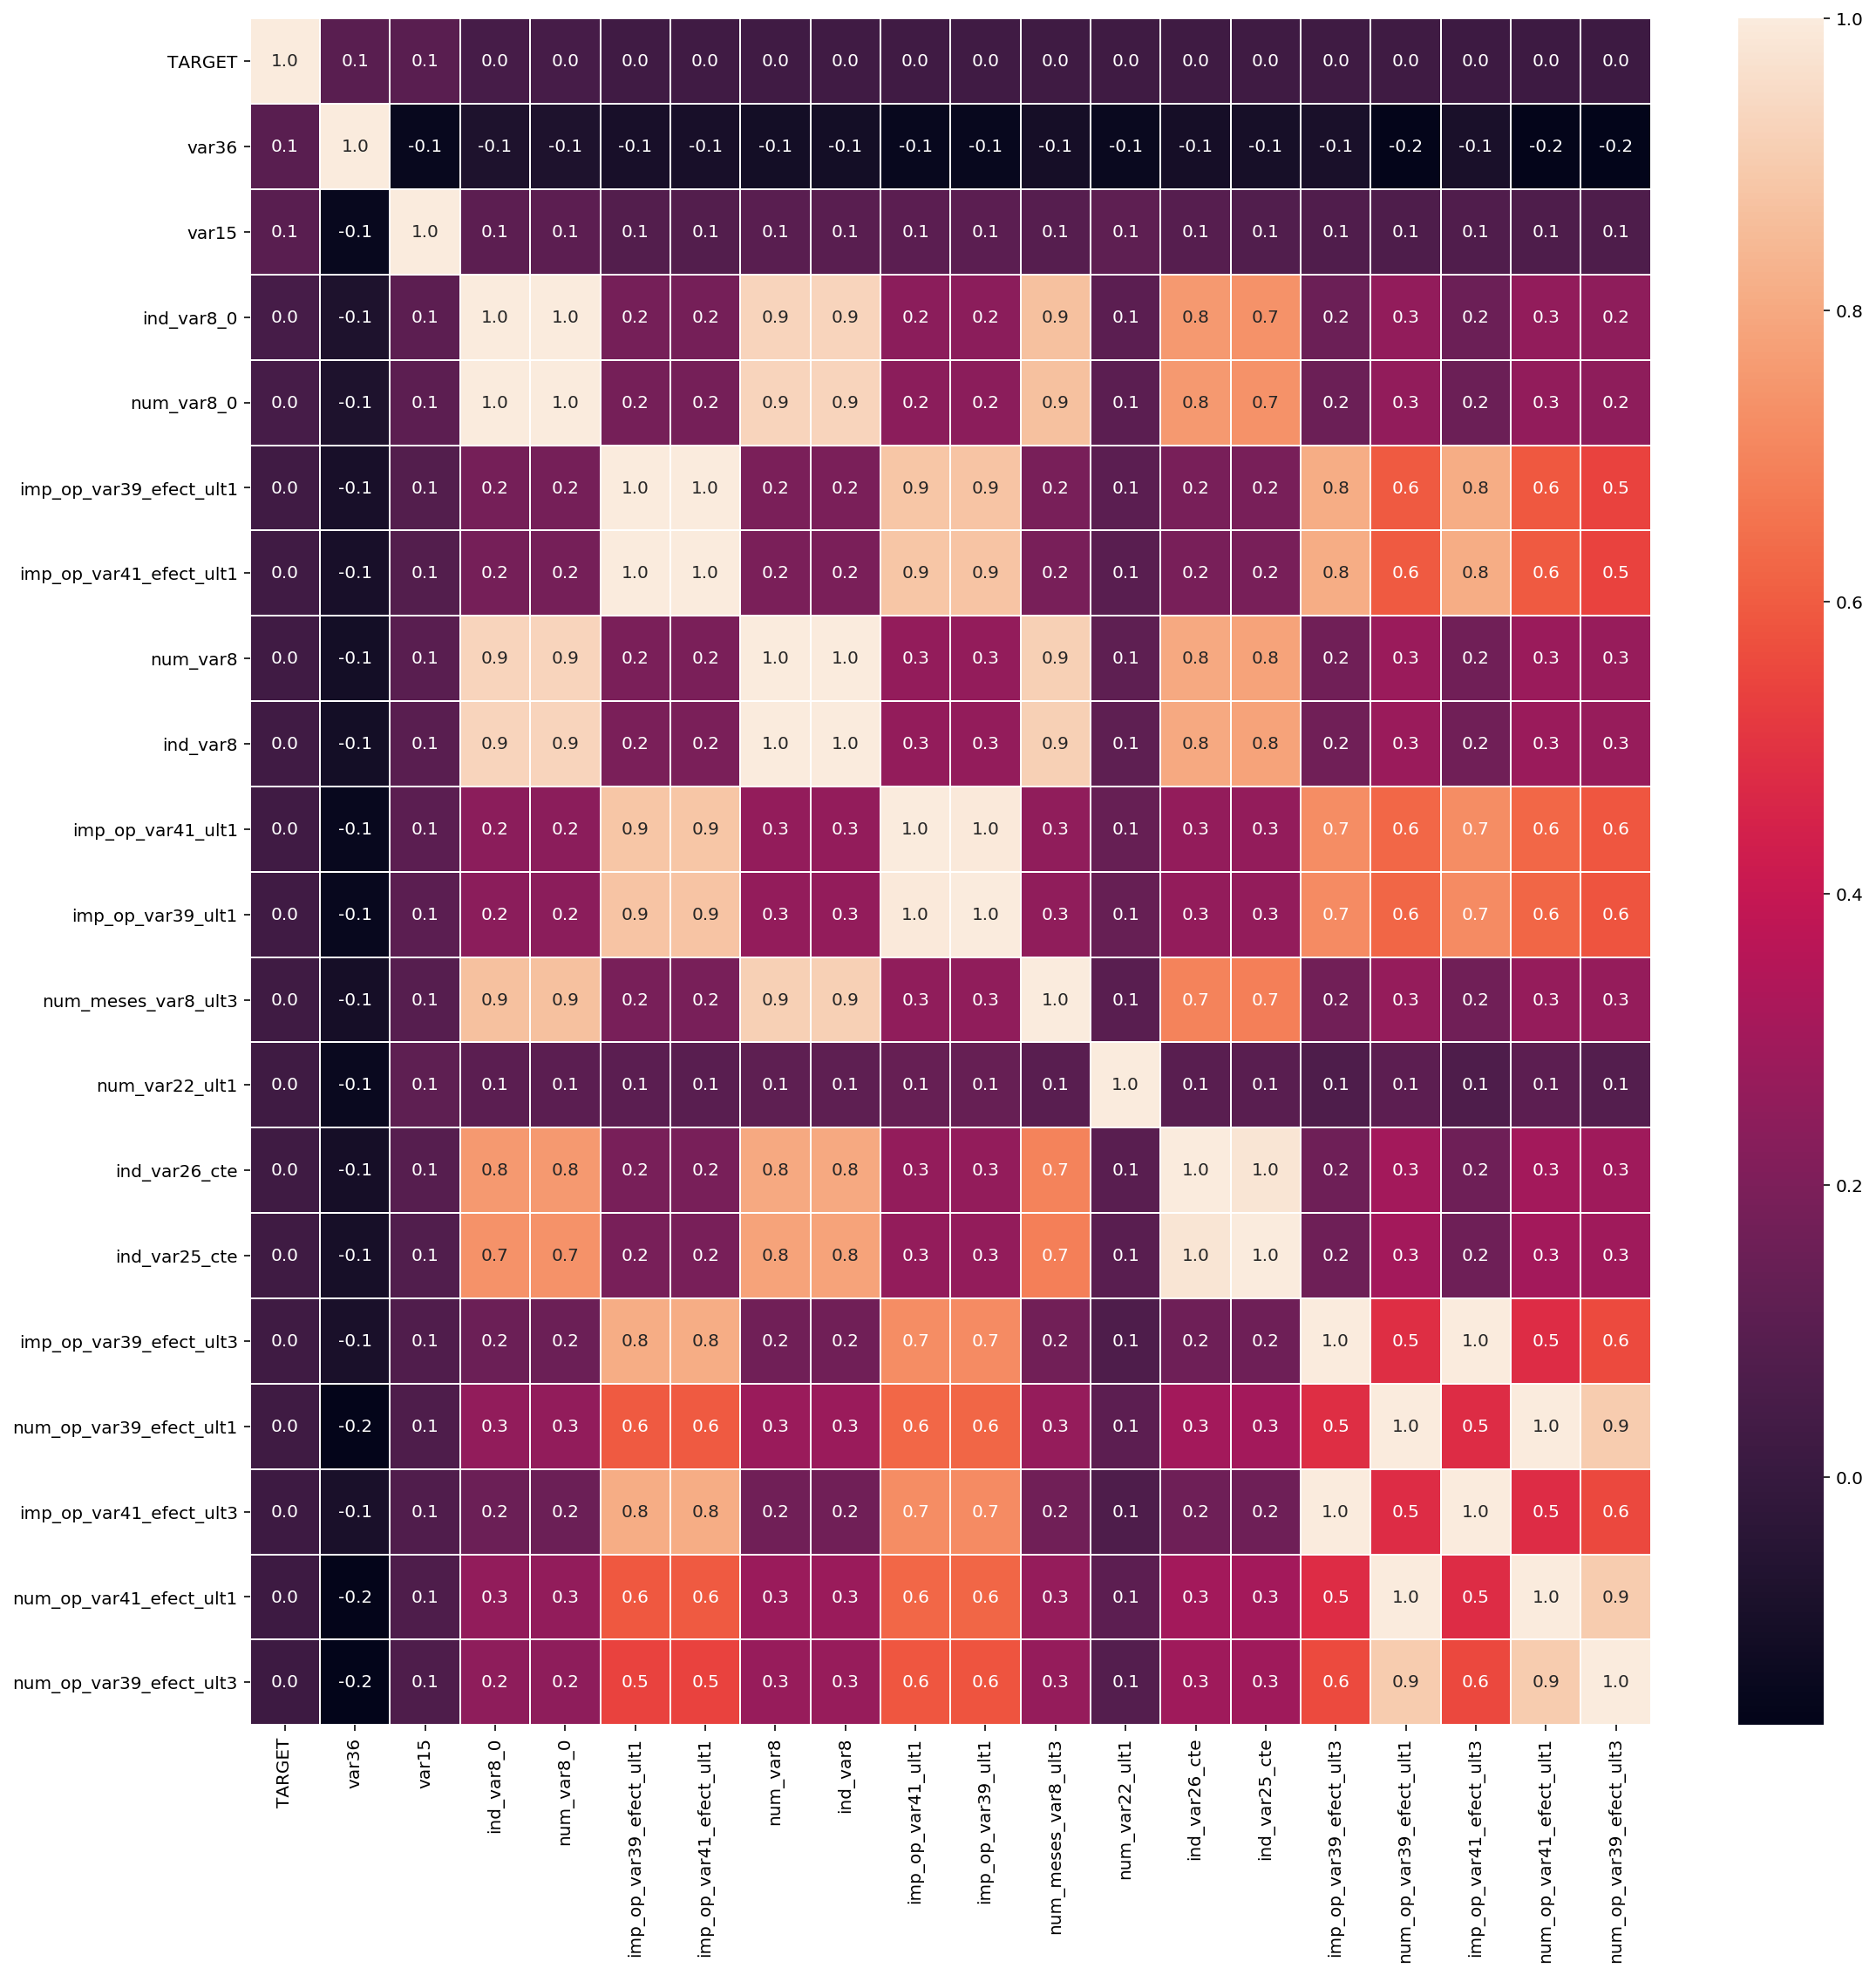

In [33]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix1, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [34]:
df_train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [35]:
# Проверим на категориальные переменные

In [36]:
categorical_list = []
numerical_list = []
for i in df_train.columns.tolist():
    if df_train[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 0
Number of numerical features: 371


In [37]:
# Заполним пропуски медианой

In [38]:
from sklearn.preprocessing import Imputer
df_train[numerical_list] = Imputer(strategy='median').fit_transform(df_train[numerical_list])

In [39]:
X= df_train.drop(['TARGET', 'ID'], axis= 1)

In [40]:
y = df_train.TARGET
col = X.columns

In [41]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = col)

In [43]:
X_norm = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = col)

In [44]:
num_folds = 10
seed = 7

In [45]:
# выберем модель RandomForestClassifier и проверим на ней какая стратегия - 
#нормализация или стандартизация дает более высокое качество

In [46]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [47]:
rfc = RandomForestClassifier()
results = cross_val_score(rfc, X_scaled, y, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 95.343% (0.259%)


In [48]:
results = cross_val_score(rfc, X_norm, y, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 95.403% (0.238%)


In [49]:
# Качество  выше на нормализованных данных

In [50]:
# Попробуем стратегию oversampling

In [51]:
data2 = pd.concat([y,X_norm],axis=1)

In [52]:
data2.TARGET.value_counts()

0.0    73012
1.0     3008
Name: TARGET, dtype: int64

In [53]:
max_size = data2['TARGET'].value_counts().max()
max_size

73012

In [54]:
lst = [data2]
for class_index, group in data2.groupby('TARGET'):
    lst.append(group.sample(max_size-len(group), replace=True))
data2_new = pd.concat(lst)

In [55]:
data2_new.TARGET.value_counts()

1.0    73012
0.0    73012
Name: TARGET, dtype: int64

In [56]:
y_over = data2_new.TARGET
X_norm_over = data2_new.drop('TARGET', axis = 1)

In [57]:
results = cross_val_score(rfc, X_norm_over, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 95.869% (0.355%)


In [58]:
# оверсемплинг не на много ухудшил качество модели
# пробуем андерсемплинг

In [59]:
data2 = pd.concat([y,X_norm],axis=1)

In [60]:
data2.TARGET.value_counts()

0.0    73012
1.0     3008
Name: TARGET, dtype: int64

In [61]:
count_class_0, count_class_1 = data2.TARGET.value_counts()
df_class_0 = data2[data2['TARGET'] == 0]
df_class_1 = data2[data2['TARGET'] == 1]

Random under-sampling:
1.0    3008
0.0    3008
Name: TARGET, dtype: int64


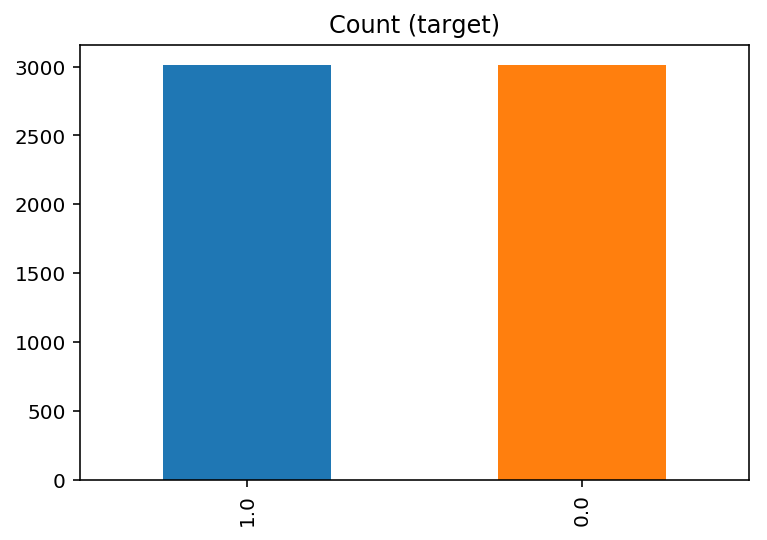

In [62]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.TARGET.value_counts())

df_under.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [63]:
y_under = df_under.TARGET
X_norm_under = df_under.drop('TARGET', axis = 1)

In [64]:
results = cross_val_score(rfc, X_norm_under, y_under, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 66.204% (5.626%)


In [65]:
#стратегия андерсемплинга сильно ухудшает качество модели, выбираем оверсемплинг для сбалансированности классов

In [66]:
# отберем фичи через коэффициент корреляции Пирсона

In [67]:
feature_name = X.columns.tolist()
def cor_selector(X, y, n_features):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-n_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [68]:
cor_support, cor_feature = cor_selector(X, y, 30)
print(str(len(cor_feature)), 'selected features')

30 selected features


In [69]:
cor_feature

['ind_var24',
 'ind_var5_0',
 'num_var30_0',
 'num_var12',
 'ind_var41_0',
 'num_var13_corto_0',
 'ind_var12',
 'ind_var13_corto_0',
 'num_meses_var13_corto_ult3',
 'num_var13_corto',
 'ind_var13_corto',
 'ind_var39_0',
 'saldo_var30',
 'num_var13_0',
 'ind_var12_0',
 'num_var13',
 'ind_var13_0',
 'ind_var13',
 'num_var8_0',
 'ind_var8_0',
 'num_var35',
 'num_var4',
 'var15',
 'var36',
 'num_var5',
 'ind_var5',
 'num_var42',
 'num_var30',
 'num_meses_var5_ult3',
 'ind_var30']

In [70]:
X_norm_FE_Pearson = X_norm_over.loc[:, cor_feature]

In [71]:
results = cross_val_score(rfc, X_norm_FE_Pearson, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 84.305% (1.866%)


In [72]:
#Оставим 30 лучших фичей по F-value

In [73]:
select = SelectKBest(f_regression, k=30)

In [74]:
X_norm_FE_f_reg = select.fit_transform(X_norm_over,y_over)

In [75]:
X_norm_FE_f_reg.shape

(146024, 30)

In [76]:
#получим список отобранных фич
print(col[select.get_support()])

Index(['var15', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13',
       'ind_var24', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0',
       'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto',
       'num_var13', 'num_var24_0', 'num_var24', 'num_var30', 'num_var35',
       'num_var42', 'saldo_var13', 'saldo_var30', 'var36',
       'num_meses_var5_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3'],
      dtype='object')


In [77]:
X_norm_FE_f_reg = pd.DataFrame(X_norm_FE_f_reg, columns = col[select.get_support()])

In [78]:
results = cross_val_score(rfc, X_norm_FE_f_reg, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 84.495% (1.240%)


In [79]:
# Выберем фичи используя стратегию хи квадрат

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_selector = SelectKBest(chi2, k=30)
chi_selector.fit(X_norm, y)

SelectKBest(k=30, score_func=<function chi2 at 0x7f629680be18>)

In [81]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

30 selected features


In [95]:
X_norm_FE_chi = X_norm_over.loc[:, chi_feature]

In [96]:
results = cross_val_score(rfc, X_norm_FE_chi, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 76.592% (1.978%)


In [84]:
# Используем стратегию  recursive feature elimination - оставим 30 фичей

In [114]:
estimator = LogisticRegression()

In [115]:
rfe = RFE(estimator, 30, step = 10) 

In [116]:
selector = rfe.fit(X_norm_over,y_over)

In [117]:
print(col[selector.support_])

Index(['var15', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_ult1', 'ind_var13',
       'ind_var33_0', 'num_var42', 'saldo_var5', 'saldo_var12', 'saldo_var30',
       'saldo_var42', 'imp_var43_emit_ult1', 'num_aport_var13_hace3',
       'num_ent_var16_ult1', 'num_var22_ult1', 'num_var22_ult3',
       'num_meses_var13_largo_ult3', 'num_meses_var17_ult3',
       'num_op_var40_efect_ult3', 'num_reemb_var17_ult1',
       'num_var43_recib_ult1', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_ult1', 'saldo_medio_var8_hace2',
       'saldo_medio_var12_hace3', 'saldo_medio_var12_ult3', 'var38'],
      dtype='object')


In [118]:
X_norm_FE_RFE = selector.transform(X_norm_over)

In [119]:
X_norm_FE_RFE.shape

(146024, 30)

In [120]:
X_norm_FE_RFE = pd.DataFrame(X_norm_FE_RFE, columns = col[selector.support_])

In [121]:
results = cross_val_score(rfc, X_norm_FE_RFE, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 96.133% (1.681%)


In [ ]:
#Стратегия recursive feature elimination позволила улучшить качество модели при кросс-валидации 
#даже при отборе только 30 фичей

In [100]:
from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=30), threshold='1.25*median')
embeded_rf_selector.fit(X_norm_over, y_over)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold='1.25*median')

In [104]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_norm_over.loc[:,embeded_rf_support].columns.tolist()
X_norm_FE_SelectRF = X_norm_over.loc[:,embeded_rf_support]
print(str(len(embeded_rf_feature)), 'selected features')

178 selected features


In [105]:
results = cross_val_score(rfc, X_norm_FE_SelectRF, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 95.853% (0.478%)


In [ ]:
#Стратегия отбора фич встроенными методами (Wrappers) показала что фичей должно быть больше чем 30, 
#пробуем автоматический подбор количества фичей

In [123]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier()
selector = RFECV(estimator, step=20, cv=5, n_jobs=4)
selector = selector.fit(X_norm_over, y_over)

In [125]:
embeded_rf_support = selector.get_support()
embeded_rf_feature = X_norm_over.loc[:,embeded_rf_support].columns.tolist()
X_norm_FE_RFECV = X_norm_over.loc[:,embeded_rf_support]
print(str(len(embeded_rf_feature)), 'selected features')

29 selected features


In [94]:
#Попробуем разные модели только для отобранных нормализованных фичей

In [129]:
results = cross_val_score(rfc, X_norm_FE_RFECV, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 96.734% (1.105%)


In [126]:
xgb = xgboost.XGBClassifier(max_depth=5, random_seed = 42, n_jobs=4)
results = cross_val_score(xgb, X_norm_FE_RFECV, y_over, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Accuracy: 77.288% (1.251%)


/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [128]:
LogReg = LogisticRegression()
results = cross_val_score(LogReg, X_norm_FE_RFECV, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 66.080% (3.095%)


In [127]:
destree = DecisionTreeClassifier()
results = cross_val_score(destree, X_norm_FE_RFECV, y_over, cv=kfold, n_jobs=4)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 96.401% (2.087%)


In [ ]:
#Наилучшее качество предсказания по крос-валидации дал RandomForestClassifier. Остановимся на этой модели.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_FE_RFECV, y_over, test_size=0.2, random_state=7)

In [134]:
grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 30, 50, 70, 100],
    'max_depth': [1,3,5,7,9, None],
}
grid_lr = GridSearchCV(RandomForestClassifier(), grid, scoring='accuracy', cv=5, n_jobs=4)

In [135]:
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [1, 3, 5, 7, 9, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
grid_lr.best_score_

0.9701418433645211

In [137]:
grid_lr.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}

In [138]:
model = grid_lr.best_estimator_

In [139]:
# Посмотрим на важность признаков в модели:

In [140]:
def takeSecond(elem):
    return elem[1]

In [141]:
for i in sorted(zip(X_train.columns, model.feature_importances_),  key = takeSecond, reverse = True):
    print (i)

('var38', 0.22730652551306804)
('var15', 0.22447576737459546)
('saldo_medio_var5_ult3', 0.05090670670805128)
('saldo_var30', 0.04930033796432784)
('saldo_var5', 0.036964393413321035)
('saldo_medio_var5_hace3', 0.03340516416923265)
('saldo_medio_var5_ult1', 0.03256958168922855)
('saldo_medio_var5_hace2', 0.03142191463000944)
('num_var30', 0.029593214691195406)
('saldo_var42', 0.028224547345851277)
('num_var45_ult3', 0.024067890055769724)
('num_var4', 0.020008245088258513)
('num_var22_ult3', 0.01975063497399194)
('var36', 0.018938181477379256)
('num_var45_hace3', 0.01770962533959246)
('num_var45_hace2', 0.01648499901658451)
('num_meses_var39_vig_ult3', 0.015514937679998215)
('num_var45_ult1', 0.012834770140452255)
('num_var22_hace2', 0.012132240123233601)
('num_var22_hace3', 0.011409695539651632)
('num_med_var45_ult3', 0.01116280536375517)
('imp_op_var39_ult1', 0.011057974818597206)
('imp_op_var41_ult1', 0.010109119547726865)
('imp_op_var41_efect_ult3', 0.010058140768009746)
('imp_op_var

In [142]:
predicted = model.predict(X_test)

In [143]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.99      0.96      0.97     14624
        1.0       0.96      0.99      0.97     14581

avg / total       0.97      0.97      0.97     29205



In [144]:
metrics.accuracy_score(y_test, predicted)

0.9722992638246876

In [145]:
metrics.confusion_matrix(y_test, predicted)

array([[14011,   613],
       [  196, 14385]])

In [ ]:
# Проверим даст ли улучшение качества сокращение размерности пространства признаков методом главных компонент

Text(0,0.5,'explained_variance_ratio_')

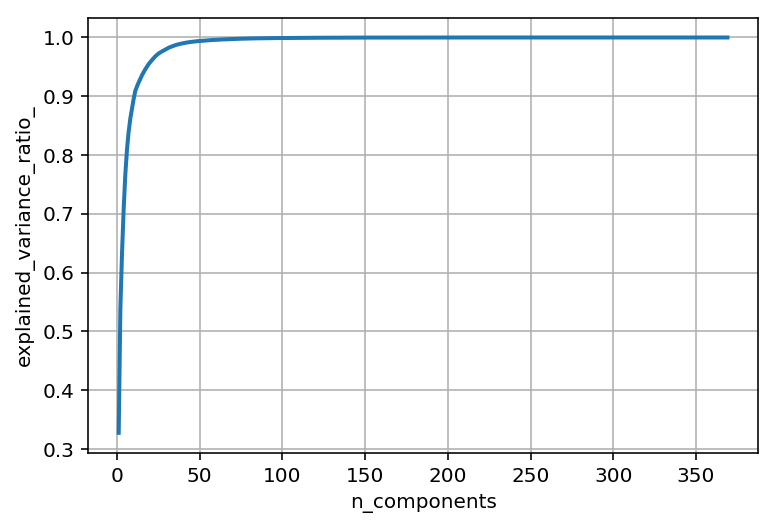

In [146]:
pca = PCA().fit(X_norm_over)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [163]:
pca = PCA(n_components=45)
X_pca = pca.fit_transform(X_norm_over)
X_pca = pd.DataFrame(X_pca)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_over, test_size=0.2, random_state=7)

In [158]:
model = RandomForestClassifier(criterion= 'gini', max_depth= None, n_estimators= 100)

In [159]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
predicted = model.predict(X_test)

In [161]:
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96     14624
        1.0       0.94      0.97      0.96     14581

avg / total       0.96      0.96      0.96     29205



In [162]:
metrics.accuracy_score(y_test, predicted)

0.9564800547851395

In [ ]:
#Качество модели не улучшилось